## Take a Quick Look at the Data Structure

In [32]:
from pathlib import Path
import pandas as pd
# This script loads a housing dataset from a CSV file located in the "datasets/housing" directory.
def load_housing_data():
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
housing.info()  # Describes the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
housing.head()  # Display the first few rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
housing.describe()  # Display descriptive statistics of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [35]:
housing["ocean_proximity"].value_counts()  # Count occurrences of each category in the 'ocean_proximity' column

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [36]:
import matplotlib.pyplot as plt

# A quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. 
# A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

IMAGES_PATH = Path() / "images" / "housing_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


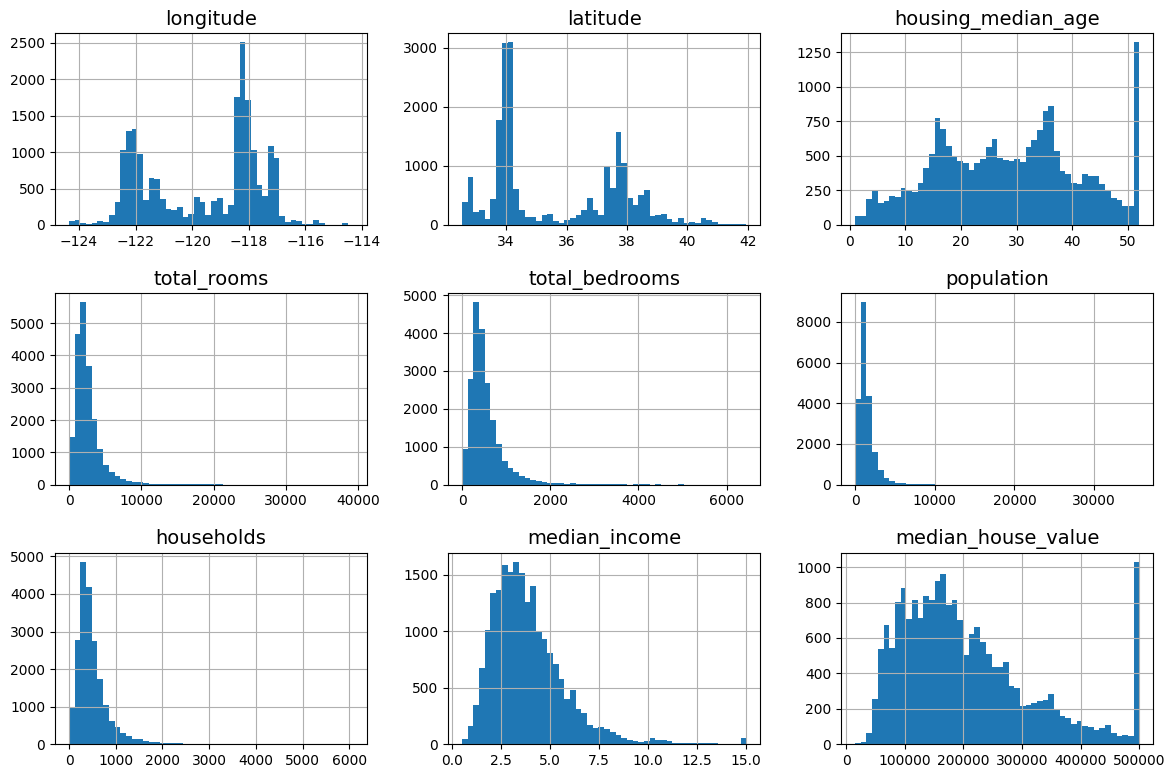

In [37]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

**How to interpret this data**
- Median income seems to be not in USD, also data is scaled and capped.i.e 3 means 30,000 USD
- Housing median age and income is also capped
- These attributes have different scaled, needs to be corrected 
- Many histograms are skewed right, need to correct to make them more symmetric and bell-shaped distributions


## Create a Test set
>Creating a test set is theoretically simple; pick some instances randomly, <br>
typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [38]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    """Shuffle the dataset and split it into a training set and a test set."""
    shuffled_indices = np.random.default_rng().permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return shuffled_indices, data.iloc[train_indices], data.iloc[test_indices]

In [39]:
shuffled_indices, train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f"First 10 shuffled indices: {shuffled_indices[:10]}")  # Display first 10 shuffled indices
print(f"Shuffled indices size: {len(shuffled_indices)}") 
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

First 10 shuffled indices: [ 8724 14526 14052 12324 14658 18031  7208 11763  4746   695]
Shuffled indices size: 20640
Training set size: 16512
Test set size: 4128


> if you run the program again, it will generate a different test set! Over time, you (or your machine learning algorithms) will get to <br> see the whole dataset, which is what you want to avoid.
>
> To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether<br> or not it should go in the test set (assuming instances have unique and immutable identifiers). <br>For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to <br> 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset.<br> The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [40]:
# Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. 
# The simplest function is train_test_split(), which does pretty much the same thing as the shuffle_and_split_data() function we defined earlier, 
# with a couple of additional features. First, there is a random_state parameter that allows you to set the random generator seed. 
# Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (
# this is very useful, for example, if you have a separate DataFrame for labels):
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


> Instead of random sampling, we need to use **Stratified sampling**: <br>the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. <br>If the people running the survey used purely random sampling, there would be about a 10.7% chance of sampling a skewed test set with less than 48.5% female or more than 53.5% female participants. <br>Either way, the survey results would likely be quite biased.


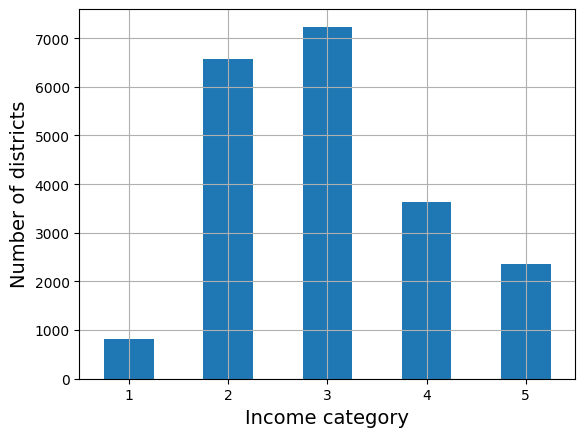

In [41]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [42]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
# The stratify parameter ensures that the income_cat column is evenly distributed in both the training and test sets.

strat_test_set["income_cat"].value_counts() / len(strat_test_set)